# Prédire le vendeur

## Contexte

Le client a différent vendeur. Avoir un moyen de prédire le vendeur
le plus proche ou le moins chère peut optimiser les décisions du client.

## Visualisation des données

In [63]:
import pandas as pd
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

with open('../params/configs/data_path.yaml', 'r') as fp:
	data_path = yaml.load(fp)
seller = pd.read_csv(data_path['olist_sellers_dataset'])
geolocation = pd.read_csv(data_path['olist_geolocation_dataset'])
customers = pd.read_csv(data_path['olist_customers_dataset'])
df= seller
#df = df.merge( geolocation, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix',left_index=True)
#df = pd.merge(df_geolocation,df_customers,  on='customer_zip_code_prefix')

<ipython-input-63-99c26847393b>:7: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data_path = yaml.load(fp)


In [16]:
df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [64]:
def fonction(zip_code,city):
    compteur = 0
    for i in df['seller_zip_code_prefix'] :
        if(i == zip_code):
            return df.iloc[compteur]
        else :
            compteur+=1;
    tempo = []
    compteur =0
    for i in df['seller_city']:
        if(i == city):        
            tempo.append(df.iloc[compteur])
            compteur+=1;
        else:
            compteur+=1;
    if(tempo==[]):return "Aucun entrepôt à proximité"
    return tempo
fonction(12051,'taubate')

seller_id                 9e25199f6ef7e7c347120ff175652c3b
seller_zip_code_prefix                               12051
seller_city                                        taubate
seller_state                                            SP
Name: 3094, dtype: object

In [66]:
pdf = customers
pdf

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


<AxesSubplot:title={'center':'% de clients dans les villes'}>

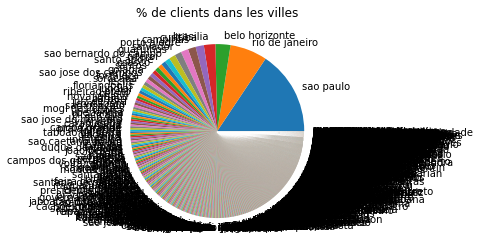

In [68]:
pdf['customer_city'].value_counts().plot.pie(title="% de clients dans les villes", label="")

<AxesSubplot:title={'center':'% de clients dans les villes'}>

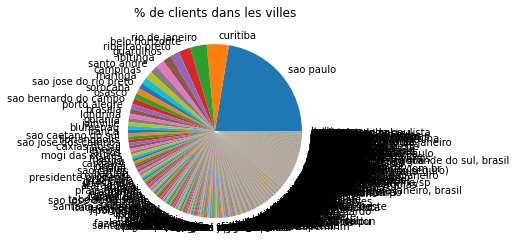

In [70]:
df['seller_city'].value_counts().plot.pie(title="% de clients dans les villes", label="")

In [81]:
list=[]
for i in df['seller_city'].value_counts().index:
    list.append(pdf['customer_city'].str.contains(i).any())
list


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True

In [84]:
df2 = pd.DataFrame(df['seller_city'].value_counts().index)
df2['present'] = list

In [85]:
df2

,0,present
0,sao paulo,True
1,curitiba,True
2,rio de janeiro,True
3,belo horizonte,True
4,ribeirao preto,True
...,...,...
606,messias targino,True
607,vargem grande paulista,True
608,itabira,True
609,extrema,True


<AxesSubplot:title={'center':'% de clients dans les villes où sont les entrepôt'}>

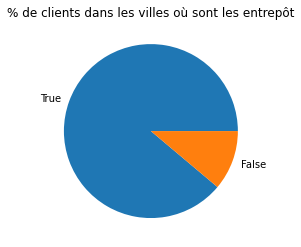

In [86]:
df2['present'].value_counts().plot.pie(title="% de clients dans les villes où sont les entrepôt", label="")

In [97]:
df2['present'].value_counts()[1]*100/ (df2['present'].value_counts()[0] + df2['present'].value_counts()[1])

88.87070376432078

In [100]:
df2['present'].value_counts()[0]*100/ (df2['present'].value_counts()[0] + df2['present'].value_counts()[1])

11.129296235679215

In [99]:
df2['present'].value_counts()

True     543
False     68
Name: present, dtype: int64

## Conclusion